# Heart Disease Prediction

<a id='import_lib'></a>
# 1. Import Libraries

In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")
import os
# 'Pandas' is used for data manipulation and analysis
import pandas as pd 
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns
# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype
# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm
# import functions to plot the decision tree
import pydotplus
from IPython.display import Image  
import graphviz

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

<a id='set_options'></a>
# 2. Set Options

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)

In [4]:
root_path='HeartDisease.csv'
df_Heart = pd.read_csv(root_path)

<a id='RD'></a>
# 3. Read Data

In [5]:
df_Heart.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Dimensions of the data

In [6]:
df_Heart.shape

(303, 14)

<a id='data_preparation'></a>
# 4. Data Analysis and Preparation

<a id='Data_Understanding'></a>
## 4.1 Understand the Dataset

In [7]:
df_Heart.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [8]:
for col in ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']:
     
    # use .astype() to change the data type
    df_Heart[col] = df_Heart[col].astype('object')

In [9]:
# recheck the data types of all variables
df_Heart.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

In [10]:
df_features = df_Heart.iloc[:, df_Heart.columns != 'target']

# target variable
df_target = df_Heart.iloc[:,df_Heart.columns == 'target']

<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics

**1. For numerical variables, use the describe()**

In [11]:
df_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**2. For categorical variables, use the describe(include=object)**

In [12]:
df_features.describe(include='object').transpose()

,count,unique,top,freq
gender,303,2,1,207
chest_pain,303,4,0,143
fasting_blood_sugar,303,2,0,258
rest_ecg,303,3,1,152
exer_angina,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thalassemia,303,4,2,166


<a id='distribution_variables'></a>
### 4.1.3 Distribution of Variables

#### 1. Distribution of numeric independent variables.

For the independent numeric variables, we plot the histogram to check the distribution of the variables.

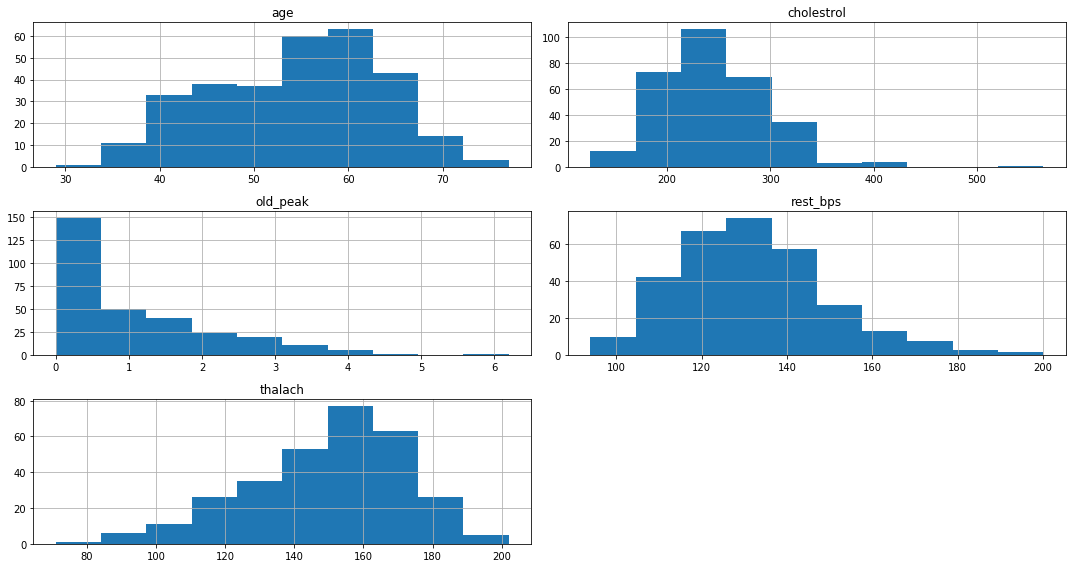

In [13]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df_features.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

#### 2. Distribution of categoric independent variables.

For the independent categoric variables, we plot the bar plot to check the distribution of each variables.

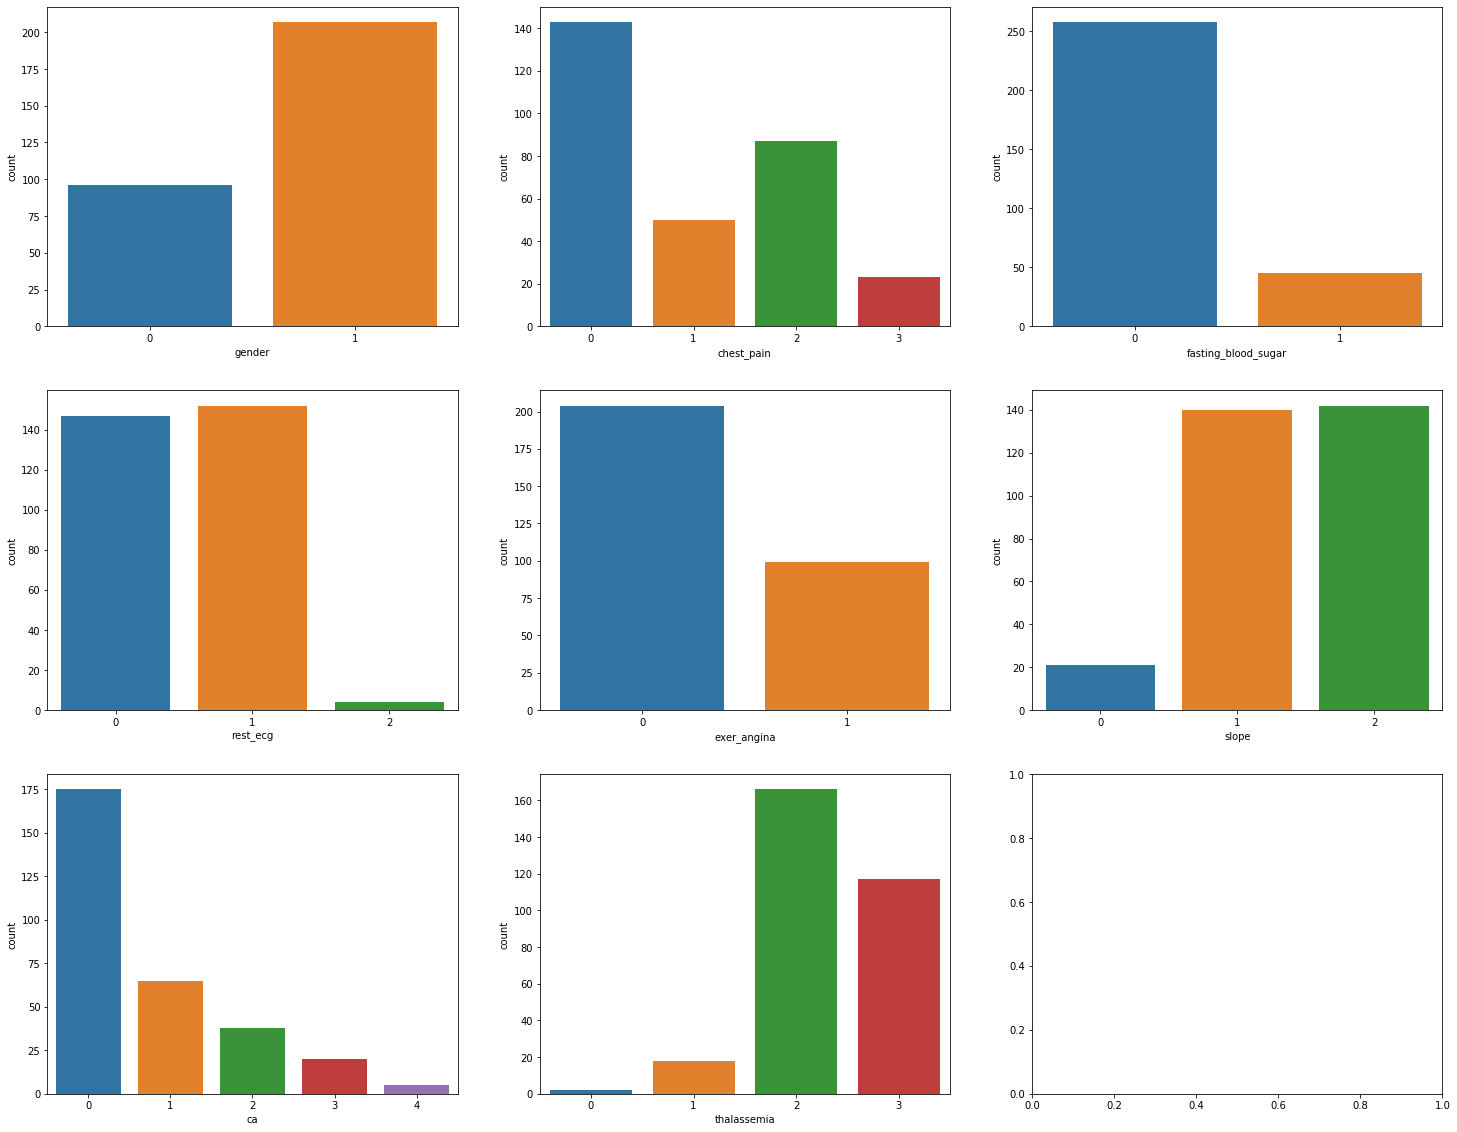

In [14]:
categorical=[]

for column in df_features:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_features[column]):
        categorical.append(column)

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(25, 20))

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_Heart[variable], ax = subplot)

plt.show()

#### 3. Distribution of dependent variable.

In [15]:
class_frequency = df_target.target.value_counts()
class_frequency

1    165
0    138
Name: target, dtype: int64

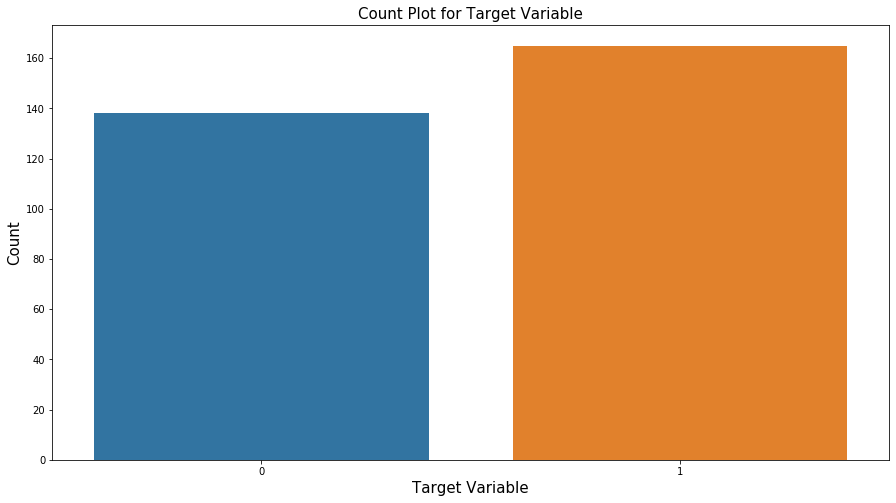

In [16]:
sns.countplot(x = df_target.target)

plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

<a id='correlation'></a>
### 4.1.4 Correlation

**1. Compute a correlation matrix**

In [17]:
corr = df_features.corr()
corr

,age,rest_bps,cholestrol,thalach,old_peak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
rest_bps,0.279351,1.000000,0.123174,-0.046698,0.193216
cholestrol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
old_peak,0.210013,0.193216,0.053952,-0.344187,1.000000


**2. Plot the heatmap for the diagonal correlation matrix**

A correlation matrix is a symmetric matrix. Plot only the lower triangular entries using a heatmap.

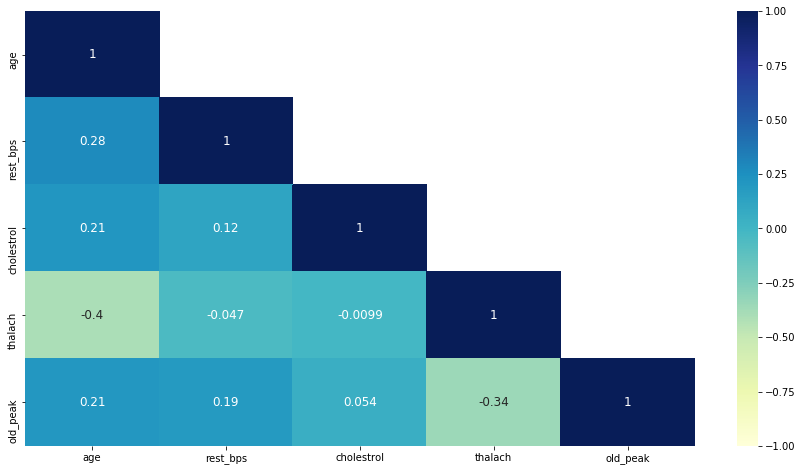

In [18]:

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(corr, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

plt.show()

<a id='outliers'></a>
### 4.1.5 Discover Outliers 

#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

**1. Plot the boxplot for numeric data**

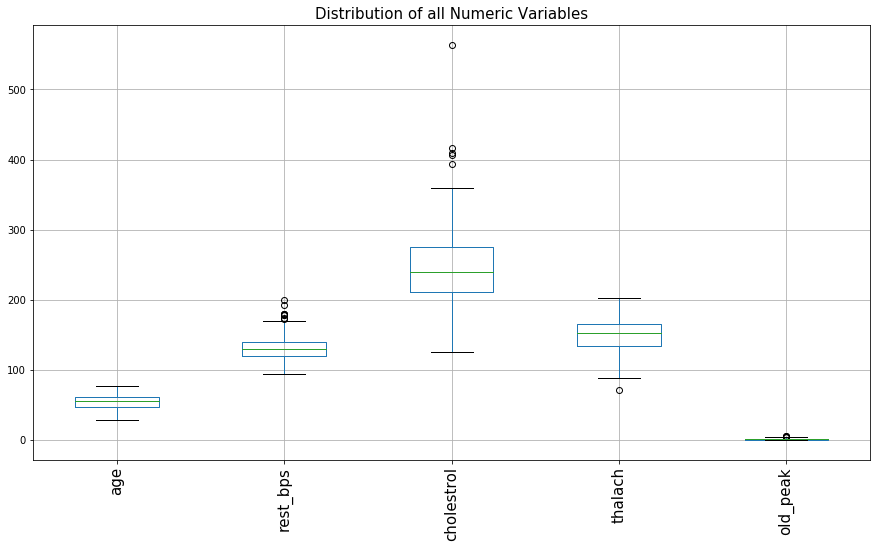

In [19]:
df_features.boxplot()

plt.title('Distribution of all Numeric Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

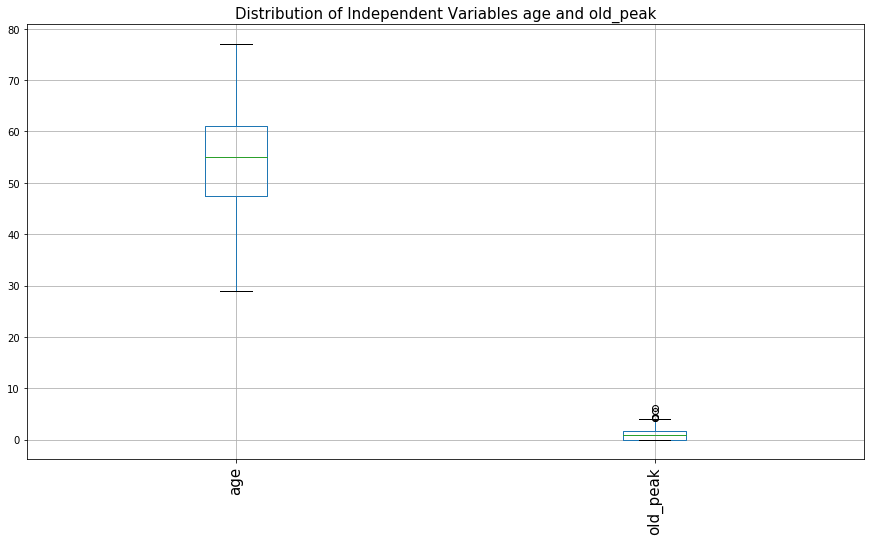

In [20]:
cols = [ 'age','old_peak']

df_features[cols].boxplot()

plt.title('Distribution of Independent Variables age and old_peak', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

**3. Remove outliers by IQR method**

In [21]:
# calculate the first quartile
Q1 = df_features.quantile(0.25)

# calculate the third quartile
Q3 = df_features.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

age           13.5
rest_bps      20.0
cholestrol    63.5
thalach       32.5
old_peak       1.6
dtype: float64


In [22]:
# remove the outliers from the dataframe 'df_Heart'
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_Heart = df_Heart[~((df_Heart < (Q1 - 1.5 * IQR)) | (df_Heart > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df_Heart = df_Heart.reset_index(drop = True)

In [23]:
df_Heart.shape

(284, 14)

**4. Plot the boxplot to recheck for outliers**

We plot the boxplots for all variables except for the variable `white corpuscle` for better visualization.

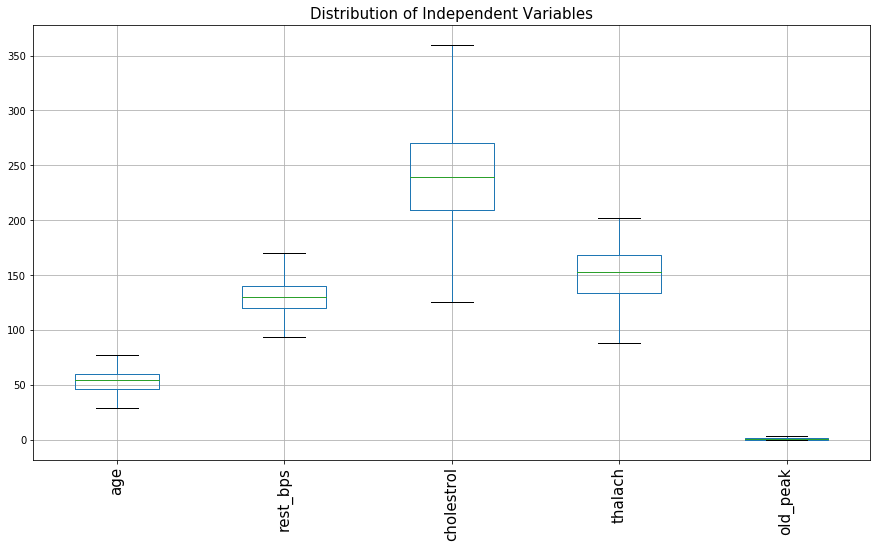

In [24]:
# make a list of numerical features without considering the 'white corpuscle'
cols = ['age','rest_bps','cholestrol','thalach','old_peak']

# plot multiple boxplots
df_Heart[cols].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

<a id='Missing_Values'></a>
### 4.1.6 Missing Values

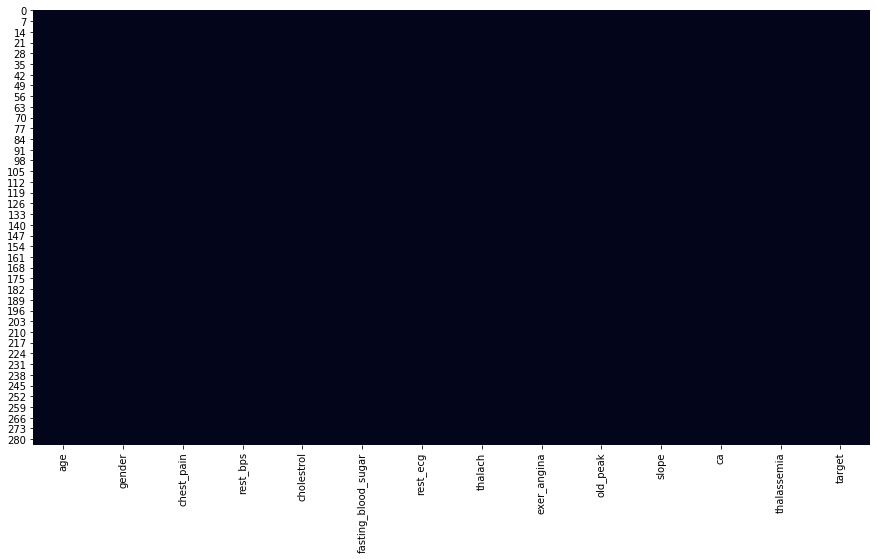

In [25]:
sns.heatmap(df_Heart.isnull(), cbar=False)

plt.show()

There are no horizontal lines in the heatmap which would correspond to a probable missing values.

<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

**1. Filter numerical and categorical variables **

In [26]:
print(df_Heart.head())

df_cat = df_Heart[categorical]
df_num = df_Heart.drop(categorical, axis = 1)

   age gender chest_pain  rest_bps  cholestrol fasting_blood_sugar rest_ecg  \
0   63      1          3       145         233                   1        0   
1   37      1          2       130         250                   0        1   
2   41      0          1       130         204                   0        0   
3   56      1          1       120         236                   0        1   
4   57      0          0       120         354                   0        1   

   thalach exer_angina  old_peak slope ca thalassemia  target  
0      150           0       2.3     0  0           1       1  
1      187           0       3.5     0  0           2       1  
2      172           0       1.4     2  0           2       1  
3      178           0       0.8     2  0           2       1  
4      163           1       0.6     2  0           2       1  


**2. Dummy encode the categorical variables**

In [27]:
# print the first five observations of the 'df_cat'
df_cat.head()

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [28]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

In [29]:
df_cat_dummies.head()

,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [30]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_Heart_dummy = pd.concat([df_num, df_cat_dummies], axis=1)

# display first five observations of the dummy dataframe
df_Heart_dummy.head()

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [31]:
# select only the target variable 'target' and store it in dataframe 'y'
y = pd.DataFrame(df_Heart_dummy['target'])

In [32]:
X = df_Heart_dummy.drop('target',axis = 1)

In [33]:
X.head()

,age,rest_bps,cholestrol,thalach,old_peak,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [34]:
def get_test_report(model):
    return(classification_report(y_test, y_pred))

In [35]:
def kappa_score(model):
    return(cohen_kappa_score(y_test, y_pred))

In [36]:
def plot_confusion_matrix(model):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [37]:
def plot_roc(model):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [38]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])
def update_score_card(model_name):
    
    global score_card
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

<a id='DecisionTree'> </a>
# 5. Decision Tree

**1. Split the data into training and test sets**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

print("X_train",X_train.shape)
print("y_train",y_train.shape)

print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (198, 22)
y_train (198, 1)
X_test (86, 22)
y_test (86, 1)


**2. Build the model**

In [40]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree_model = decision_tree.fit(X_train, y_train)

#### 3. Plot the decision tree

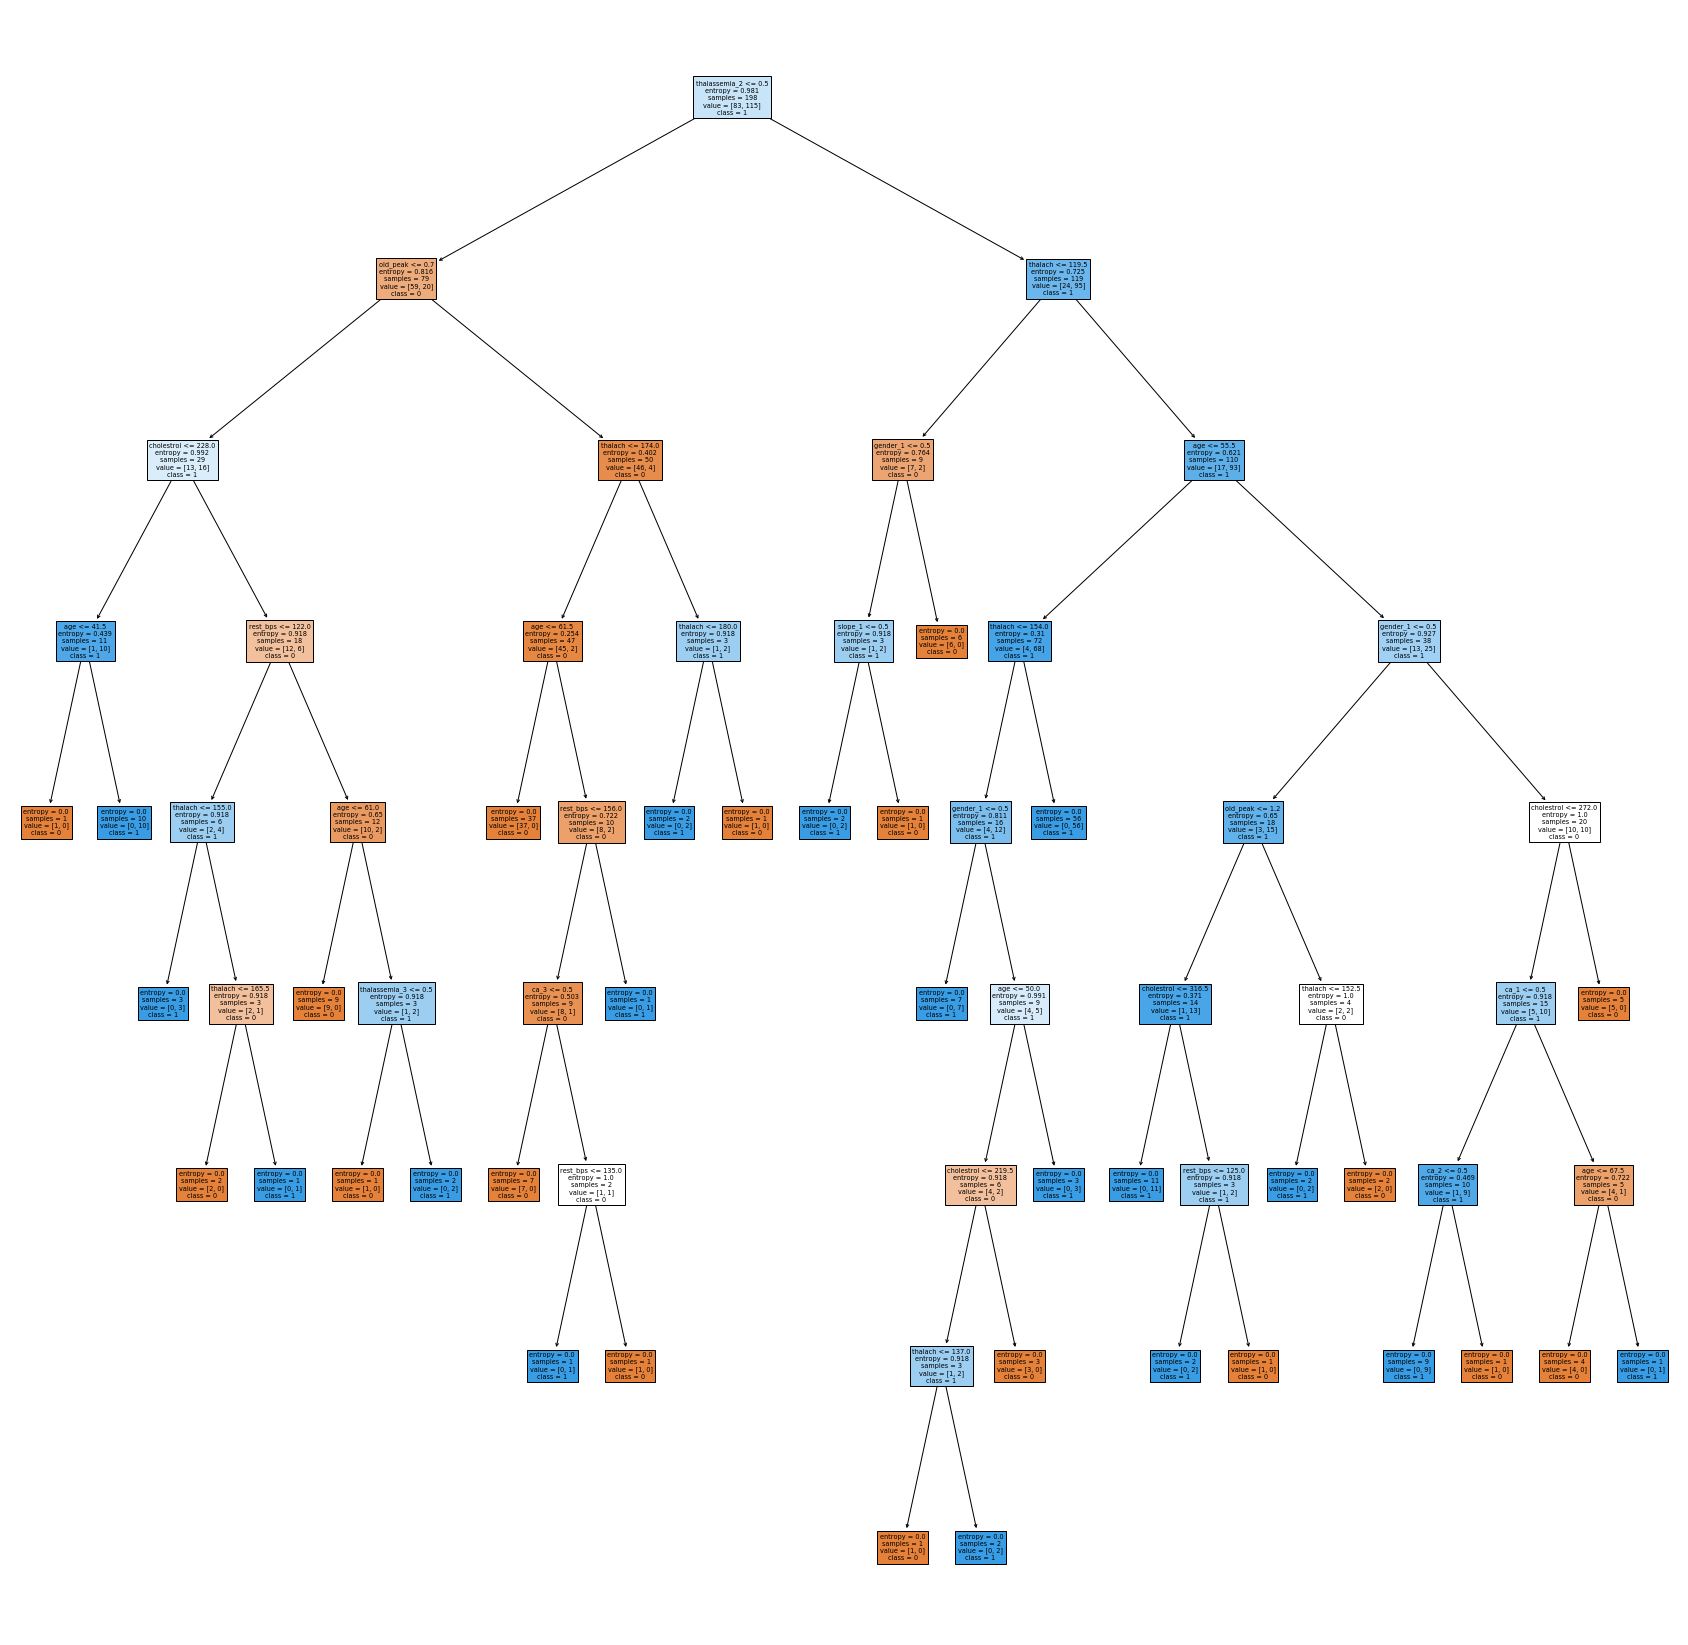

In [41]:
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

**4. Do predictions on the test set**

In [42]:
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]

In [43]:
y_pred = decision_tree_model.predict(X_test)

**5. Compute accuracy measures**

#### Build a confusion matrix.

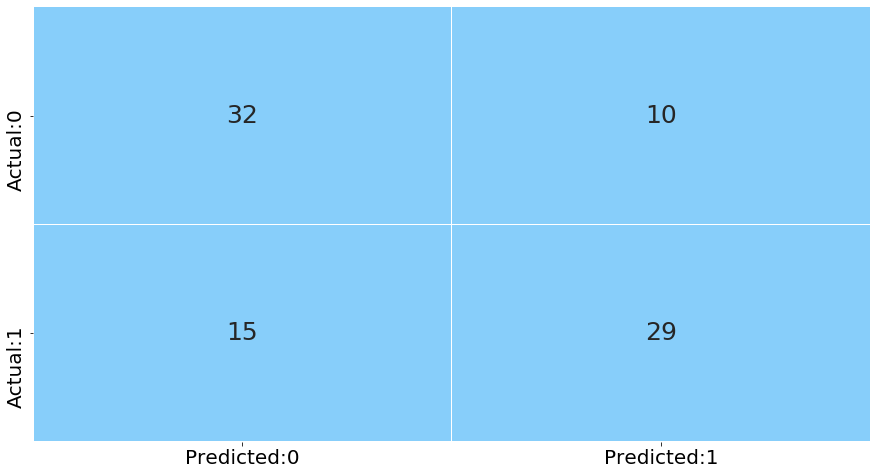

In [44]:
plot_confusion_matrix(decision_tree_model)

**Calculate performance measures on the test set.**

In [45]:
test_report = get_test_report(decision_tree_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        42
           1       0.74      0.66      0.70        44

    accuracy                           0.71        86
   macro avg       0.71      0.71      0.71        86
weighted avg       0.71      0.71      0.71        86



**Interpretation:** The accuracy is 71% for this model. Also, the sensitivity and specificity of the model is quite different.

In [46]:
kappa_value = kappa_score(decision_tree_model)

print(kappa_value)

0.41985968699406373


**Interpretation:** As the kappa score for the decision tree (pruned) is 0.4198, we can say that there is moderate agreement between the actual and predicted values.

**Plot the ROC curve.**

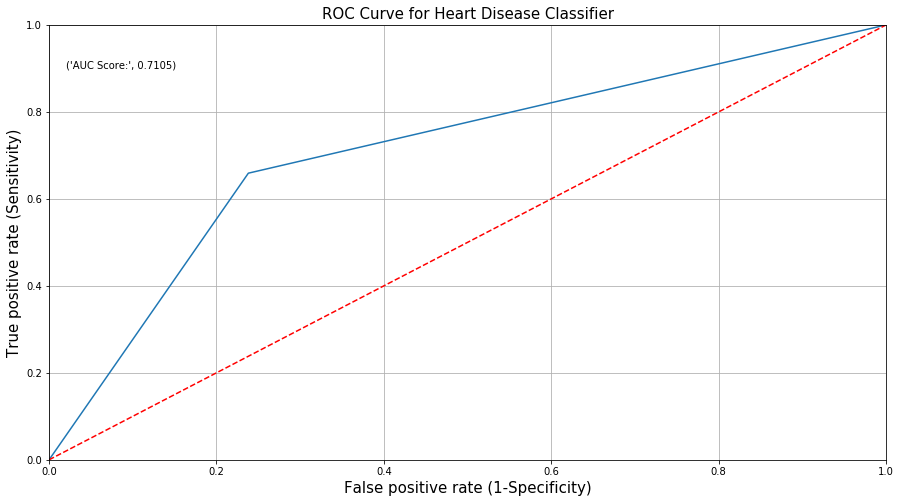

In [47]:
plot_roc(decision_tree_model)

**7. Tabulate the results**

In [48]:
update_score_card(model_name = 'Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.74359,0.659091,0.709302,0.41986,0.698795


<a id='DecisionTreePruning'></a>
## 5.2 Prune a Decision Tree 

**1. Prune the decision tree**

In [49]:
prune = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 25 , random_state = 10)

decision_tree_prune = prune.fit(X_train, y_train)

#### 2. Plot the decision tree

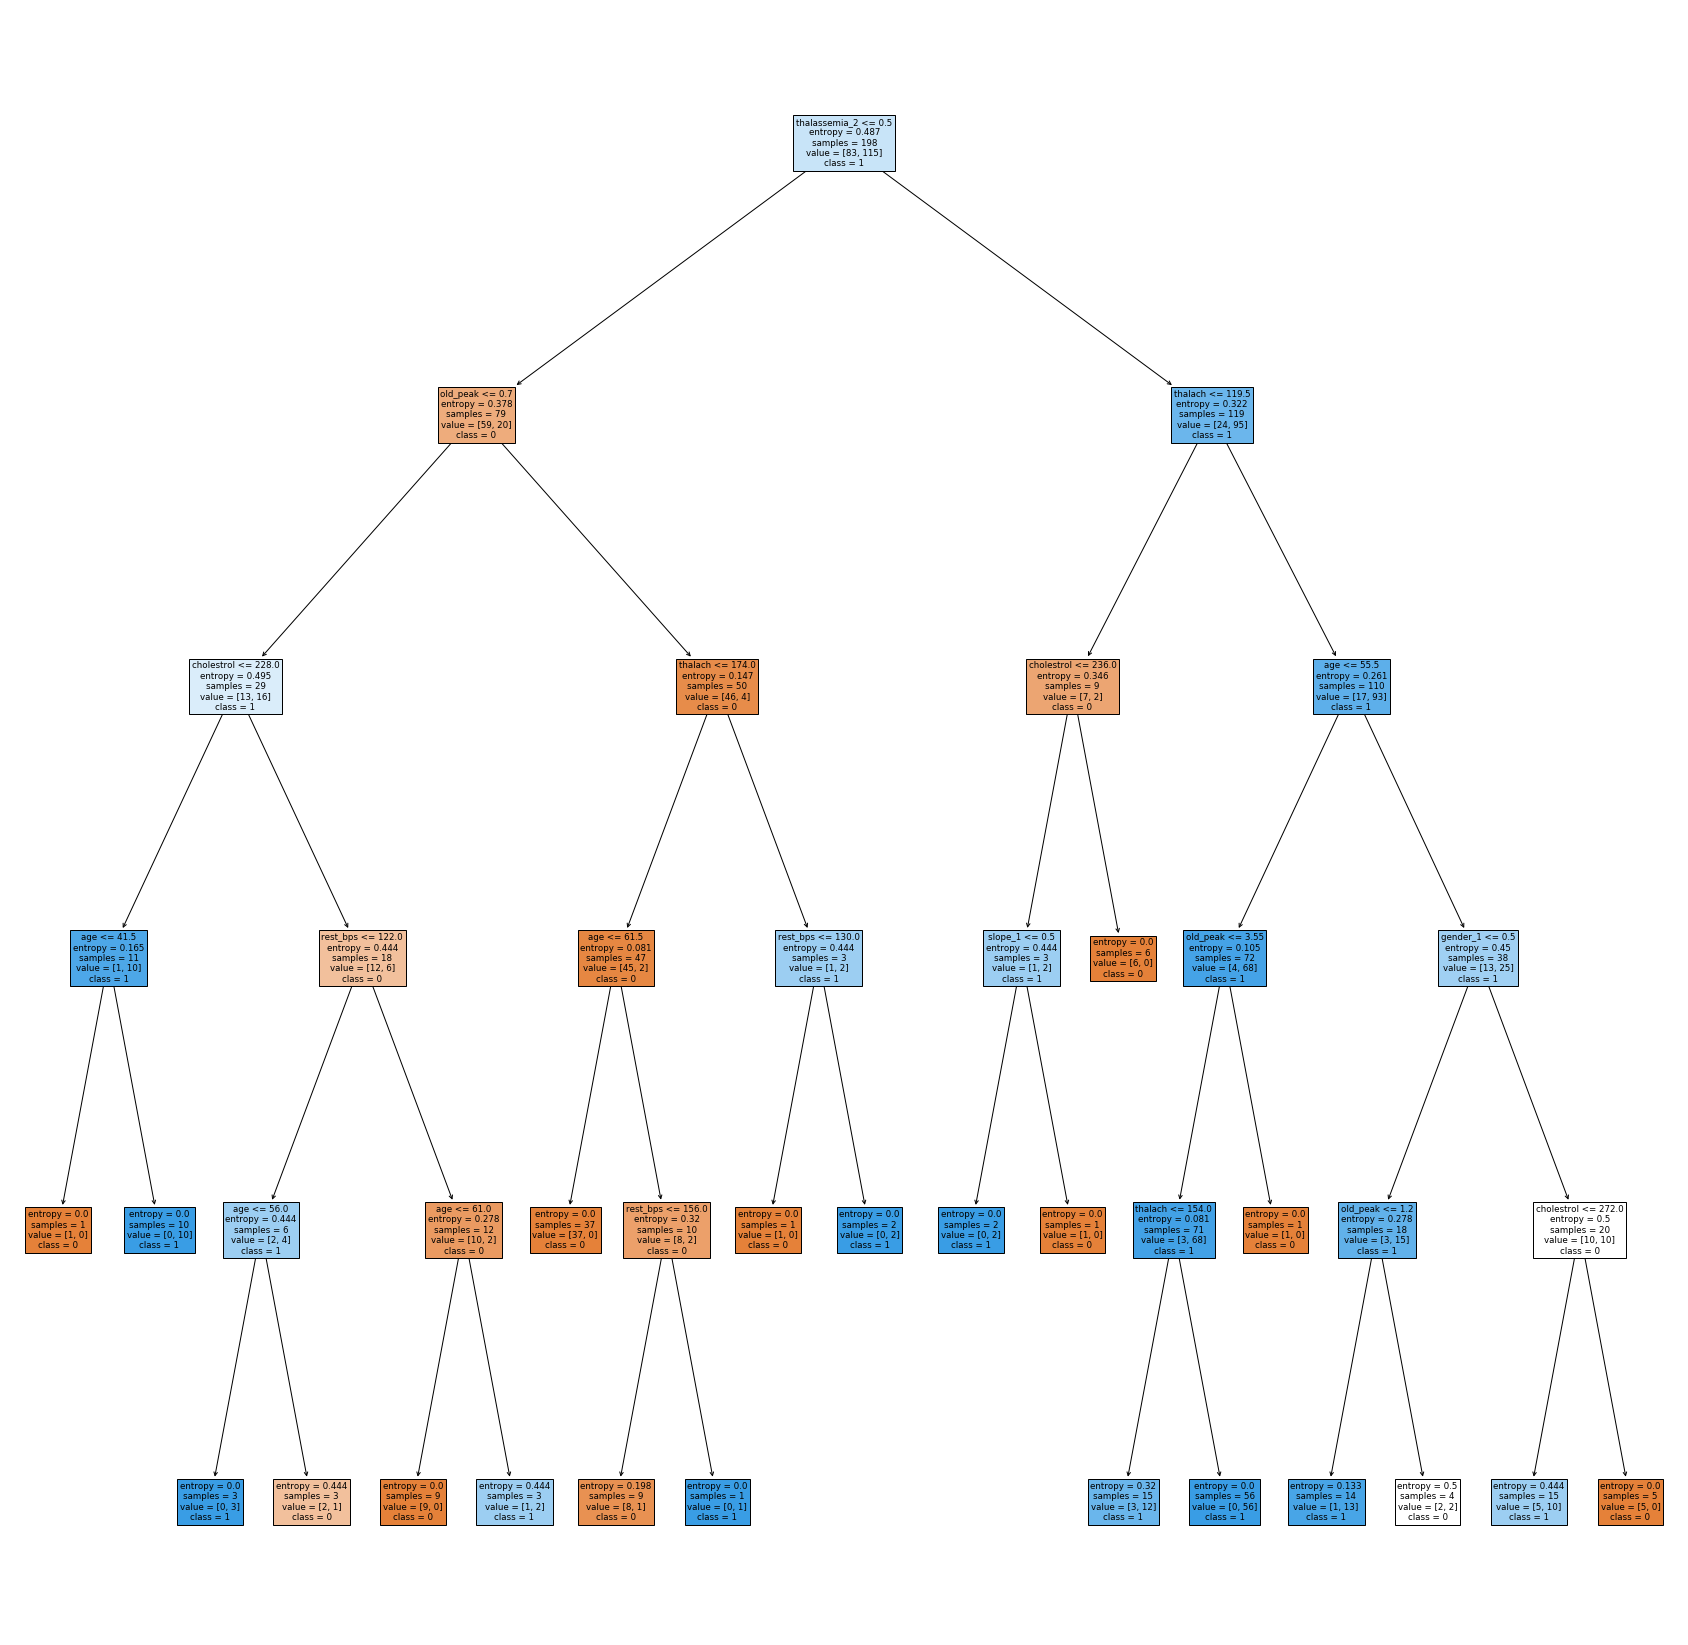

In [50]:
# save the column names in 'labels'
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_prune, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

**3. Do predictions on the test set**

In [51]:
y_pred_prob = decision_tree_prune.predict_proba(X_test)[:,1]

In [52]:
y_pred = decision_tree_prune.predict(X_test)

**4. Compute accuracy measures**

#### Build a confusion matrix.

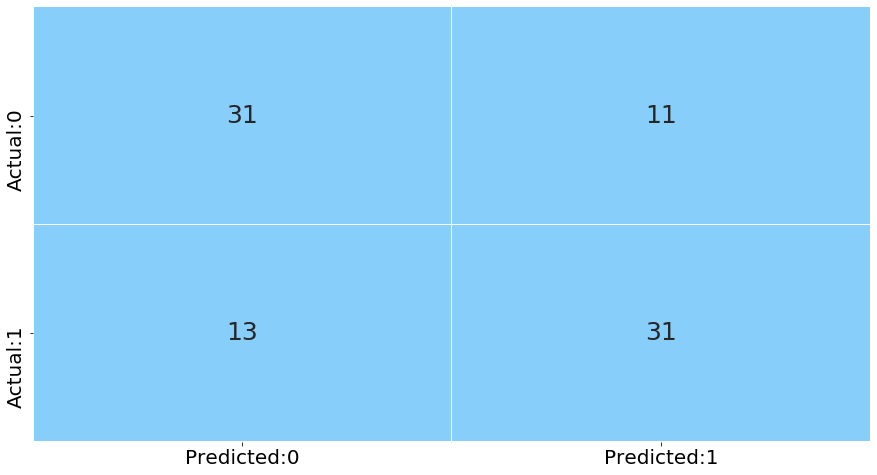

In [53]:
plot_confusion_matrix(decision_tree_prune)

**Calculate performance measures on the test set.**

In [54]:
test_report = get_test_report(decision_tree_prune)

print(test_report)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        42
           1       0.74      0.70      0.72        44

    accuracy                           0.72        86
   macro avg       0.72      0.72      0.72        86
weighted avg       0.72      0.72      0.72        86



**Interpretation:** The accuracy is 72% for this model.

In [55]:
kappa_value = kappa_score(decision_tree_prune)

print(kappa_value)

0.4421621621621622


**Interpretation:** As the kappa score for the decision tree (pruned) is 0.4421, we can say that there is moderate agreement between the actual and predicted values.

**Plot the ROC curve.**

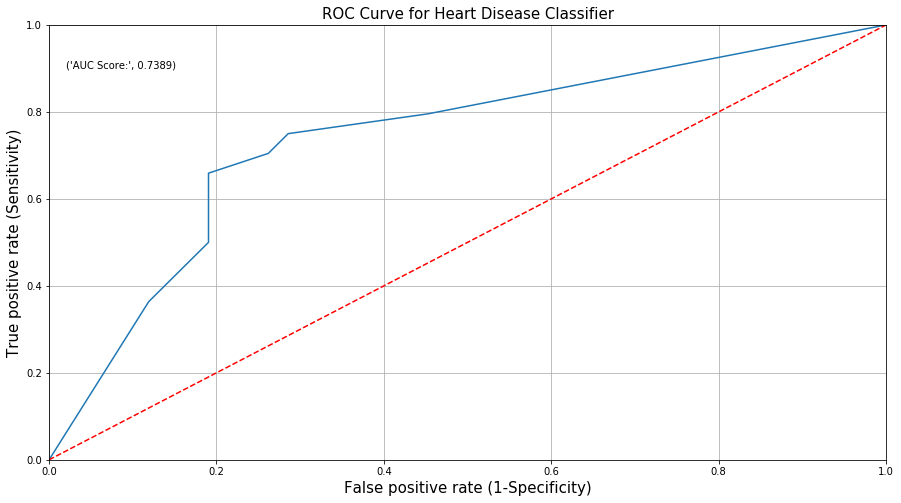

In [56]:
plot_roc(decision_tree_prune)

**5. Tabulate the results**

In [57]:
update_score_card(model_name = 'Decision Tree (Pruned)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.743590,0.659091,0.709302,0.419860,0.698795
1,Decision Tree (Pruned),0.738907,0.738095,0.704545,0.720930,0.442162,0.720930


<a id='DecisionTreewithGridSearchCv'> </a>
## 5.3 Decision Tree (using GridSearchCV)

**1. Use GridSearch to obtain the optimal values of hyperparameters**

In [58]:
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [59]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

dt_grid = grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 25, 'min_samples_split': 10} 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**2. Build the model using the hyperparameters obtained in step 1**

In [60]:
dt_grid_model = DecisionTreeClassifier(criterion = dt_grid.best_params_.get('criterion'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

dt_grid_model = dt_grid_model.fit(X_train, y_train)

#### 3. Plot the decision tree

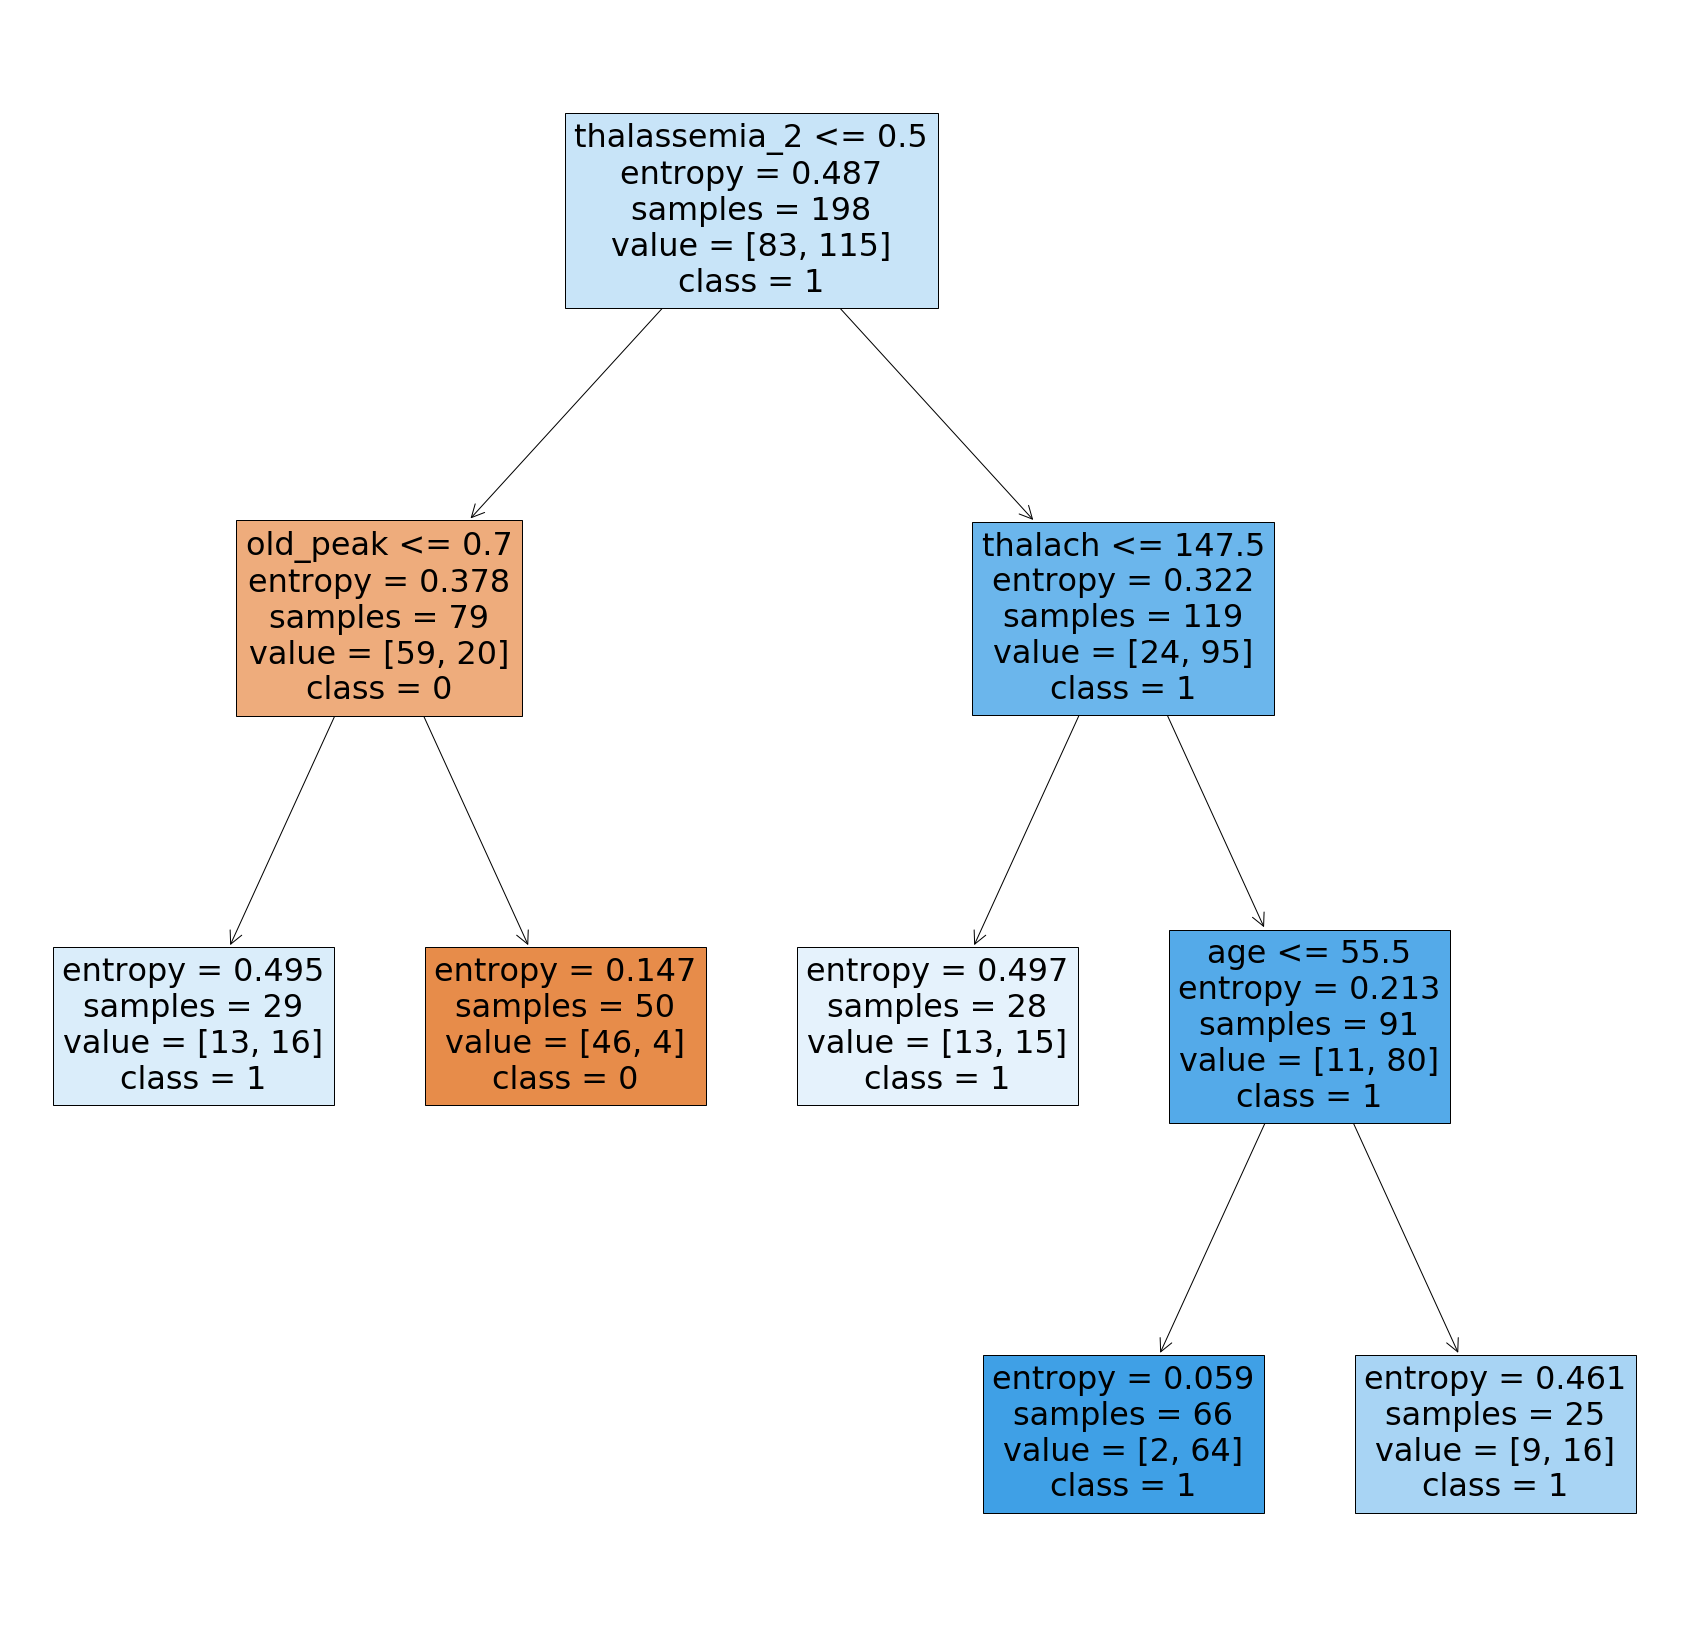

In [61]:
# save the column names in 'labels'
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_grid_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

**4. Do predictions on the test set**

In [62]:
y_pred_prob = dt_grid_model.predict_proba(X_test)[:,1]

In [63]:
y_pred = dt_grid_model.predict(X_test)

**5. Compute accuracy measures**

#### Build a confusion matrix.

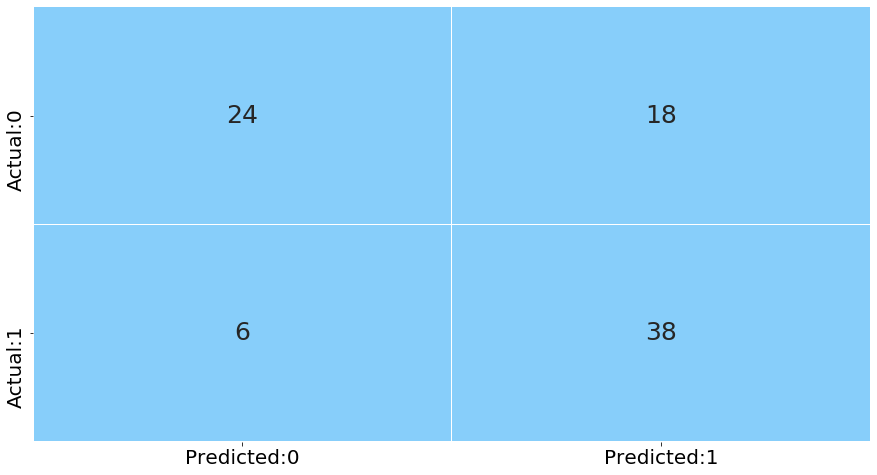

In [64]:
plot_confusion_matrix(dt_grid_model)

**Calculate performance measures on the test set.**

In [65]:
test_report = get_test_report(dt_grid_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        42
           1       0.68      0.86      0.76        44

    accuracy                           0.72        86
   macro avg       0.74      0.72      0.71        86
weighted avg       0.74      0.72      0.71        86



**Interpretation:** The accuracy is 72% for this model.

In [66]:
kappa_value = kappa_score(dt_grid_model)

# print the kappa value
print(kappa_value)

0.43790849673202614


**Interpretation:** As the kappa score for the decision tree (GridSearchCV) is 0.4379, we can say that there is moderate agreement between the actual and predicted values.

**Plot the ROC curve.**

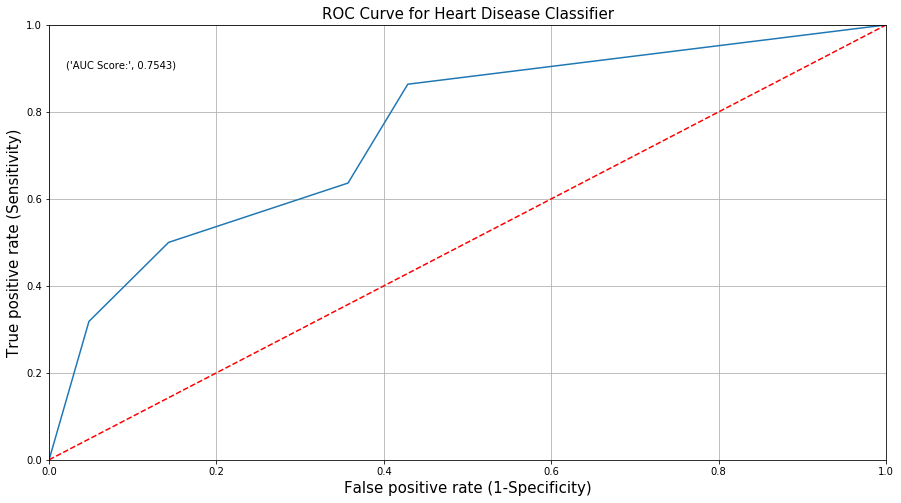

In [67]:
plot_roc(dt_grid_model)

<a id="conclusion"> </a>
# 6. Conclusion and Interpretation

**Tabulate the results**

In [68]:
update_score_card(model_name = 'Decision Tree (GridSearchCV)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.743590,0.659091,0.709302,0.419860,0.698795
1,Decision Tree (Pruned),0.738907,0.738095,0.704545,0.720930,0.442162,0.720930
2,Decision Tree (GridSearchCV),0.754329,0.678571,0.863636,0.720930,0.437908,0.760000


In [ ]:
### For the prediction I have used Decision Tree (GridSearchCV) as accuracy is 72% which is good.

In [69]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("dt_grid_model.pkl","wb")
pickle.dump(dt_grid_model, pickle_out)
pickle_out.close()